# Sentinel 3

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path
from io import StringIO
from functools import partial
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

# from nbdev.showdoc import *
# from WaterClass2.Radiometry import *
# from WaterClass2.fitting import *
# from WaterClass2.core import *

In [177]:
s3bands = [400, 412.5, 442, 490, 510, 560, 620, 665, 674, 681, 709, 754, 779, 865, 885, 1020]

def open_radiometry(path):
    old_names = [f'Oa{str(i).zfill(2)}_reflectance:float' for i in range(1, 22)]
    [old_names.remove(f'Oa{str(i).zfill(2)}_reflectance:float') for i in range(13,16)]
    [old_names.remove(f'Oa{str(i).zfill(2)}_reflectance:float') for i in range(19,21)]
    df = pd.read_csv(path).rename(columns={old_names[i]: s3bands[i] for i in range(16)})    
    return df

def normalize(df, bands, norm_band):
    df = df.copy()
    df[bands] = df[bands].to_numpy() - df[norm_band].to_numpy()[..., None]
    return df

def clip_negatives(df, bands, threshold=-0.1):
    return df.loc[~((df[bands] < -0.1).any(axis=1))]

def clean_radiometry(df, min_threshold=-0.1, norm_band=1020):

    if norm_band is not None:
        df = normalize(df, s3bands, 1020)

    df = clip_negatives(df, s3bands, -0.1)

    return df

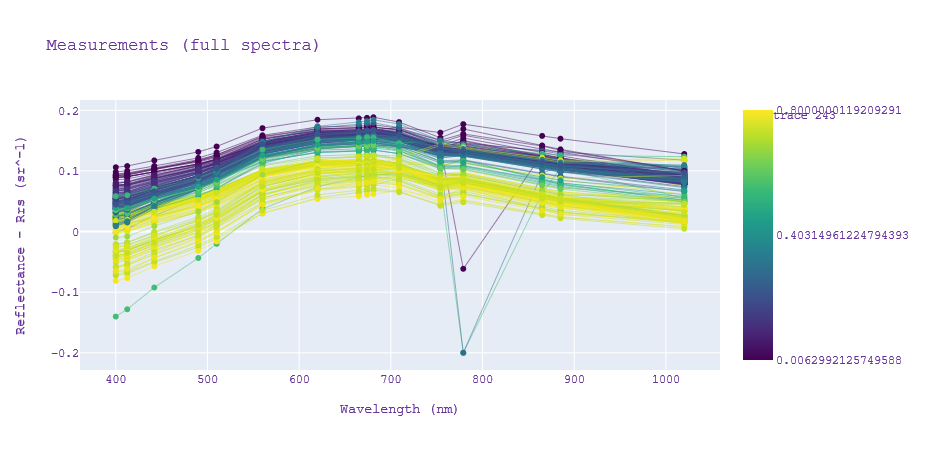

In [112]:
# file = Path(r'C:\Users\Mauricio Cordeiro\Downloads\14100000_manacapuru\S3A_OL_2_WFR____20161123T134634_20161123T134834_20171105T005133_0119_011_181______MR1_R_NT_002.csv')
# df = open_radiometry(file)
# plot_reflectances2(df, s3bands, color='T865:float', hover_vars=[], log_color=False)

## Load DataFrames in memory

In [218]:
base_path = Path(r'C:\Users\Mauricio Cordeiro\Downloads\14100000_manacapuru')

csvs = [f for f in base_path.iterdir()]

radiometries = {}
min_pixels = 10

for i, csv in enumerate(csvs):
    df = open_radiometry(csvs[i])
    if len(df) > 10:
        radiometries[csv.stem[16:24]]= df

## Calculate the mean using RAW data

In [233]:
df = pd.DataFrame()

for radiometry in radiometries:
    df = df.append(radiometries[radiometry].mean().rename(radiometry))

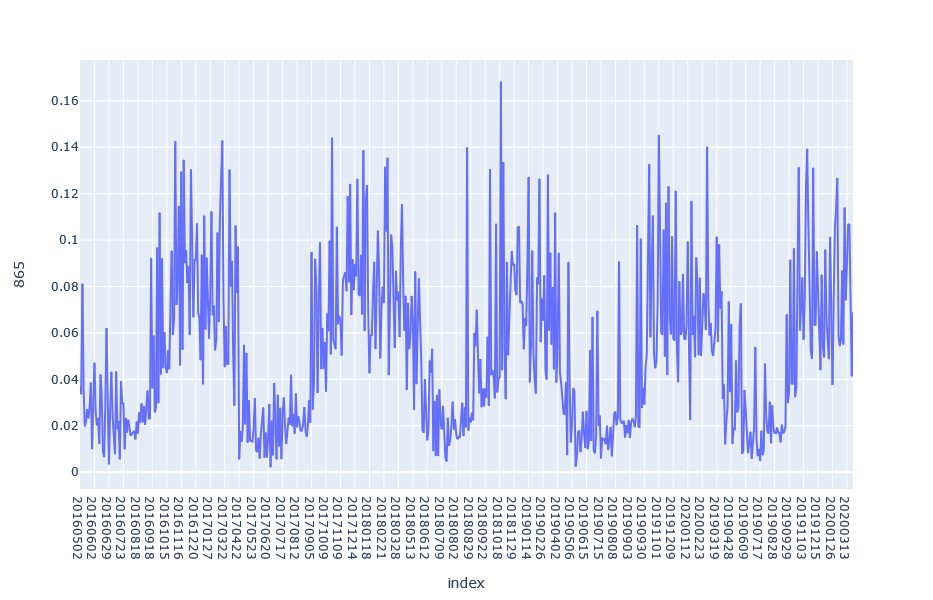

In [238]:
px.line(df, y=865, height=600, )

In [190]:
df[865].mean(),df[865].std()

(0.051476730843335594, 0.03452784048130979)

## Calc mean radiometry (getting 10% of pixels with abs(SWIR) closest to Zero)

In [241]:
df = pd.DataFrame()

for date, radiometry in radiometries.items():
    radiometry = clean_radiometry(radiometry, min_threshold=-0.1, norm_band=None) 
    radiometry['abs_1020'] = radiometry[1020].abs()
    radiometry = radiometry[radiometry['abs_1020']<radiometry['abs_1020'].quantile(q=0.20)]
    
    df = df.append(radiometry.mean().rename(date))

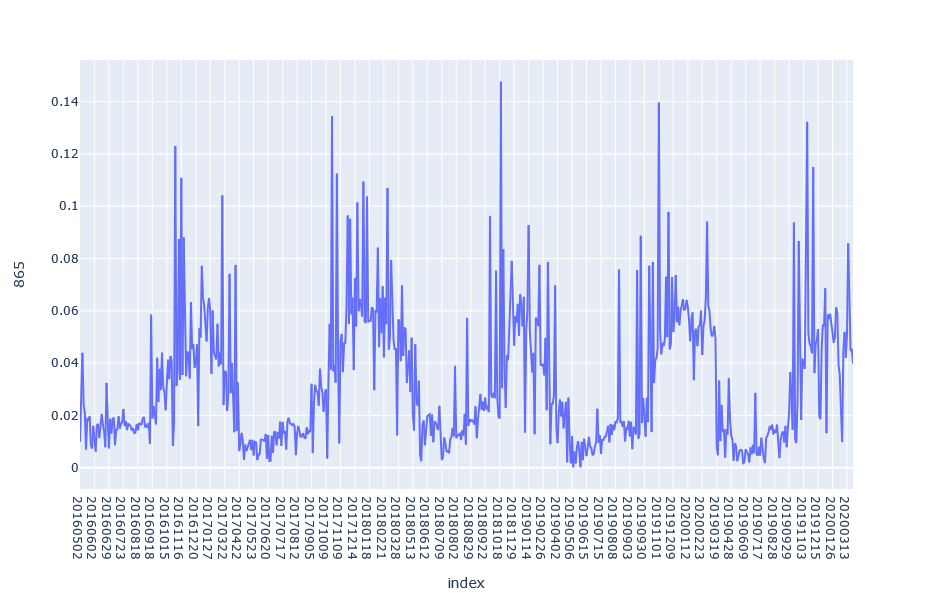

In [242]:
px.line(df, y=865, height=600,)

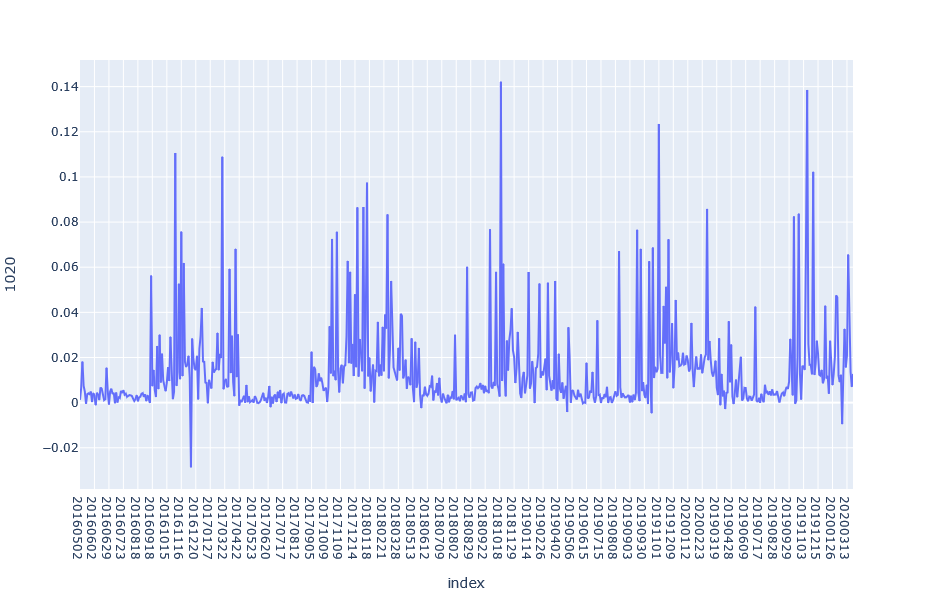

In [243]:
px.line(df, y=1020, height=600,)

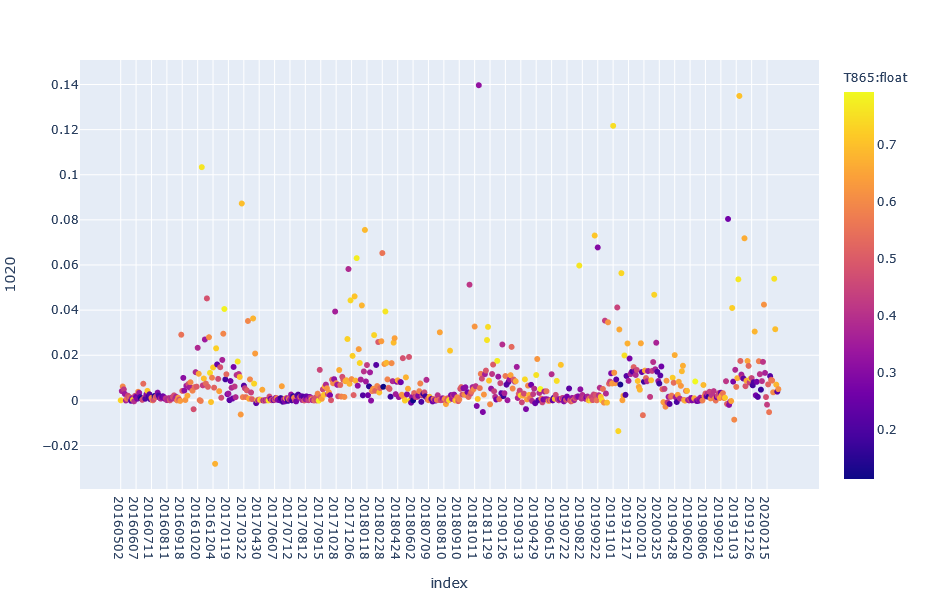

In [227]:
px.scatter(df, y=1020, height=600, color='T865:float')

In [200]:
df[865].mean(),df[865].std()

(0.024708036013629666, 0.022417181808365143)

## Calc mean radiometry (Normalized in 1020)

In [244]:
df = pd.DataFrame()

for date, radiometry in radiometries.items():
    radiometry = clean_radiometry(radiometry, min_threshold=-0.1, norm_band=1020) 
    df = df.append(radiometry.mean().rename(date))

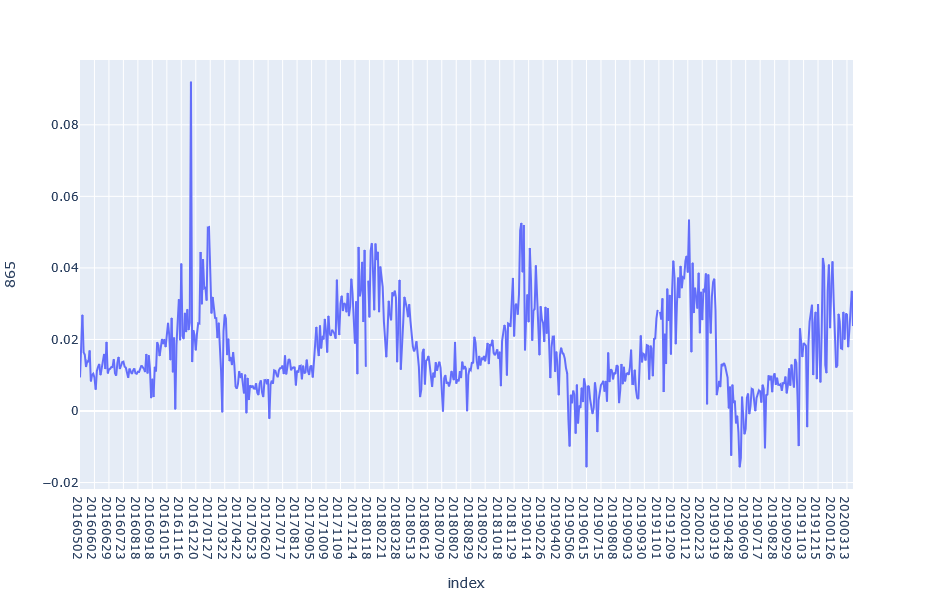

In [246]:
px.line(df, y=865, height=600,)

## Load DataFrames in memory

In [247]:
base_path = Path(r'C:\Users\Mauricio Cordeiro\Downloads\14100000_manacapuru_v15')

csvs = [f for f in base_path.iterdir()]

radiometries = {}
min_pixels = 10

for i, csv in enumerate(csvs):
    df = open_radiometry(csvs[i])
    if len(df) > 10:
        radiometries[csv.stem[16:24]]= df

## Calc mean radiometry (Normalized in 1020)

In [248]:
df = pd.DataFrame()

for date, radiometry in radiometries.items():
    radiometry = clean_radiometry(radiometry, min_threshold=-0.1, norm_band=1020) 
    df = df.append(radiometry.mean().rename(date))

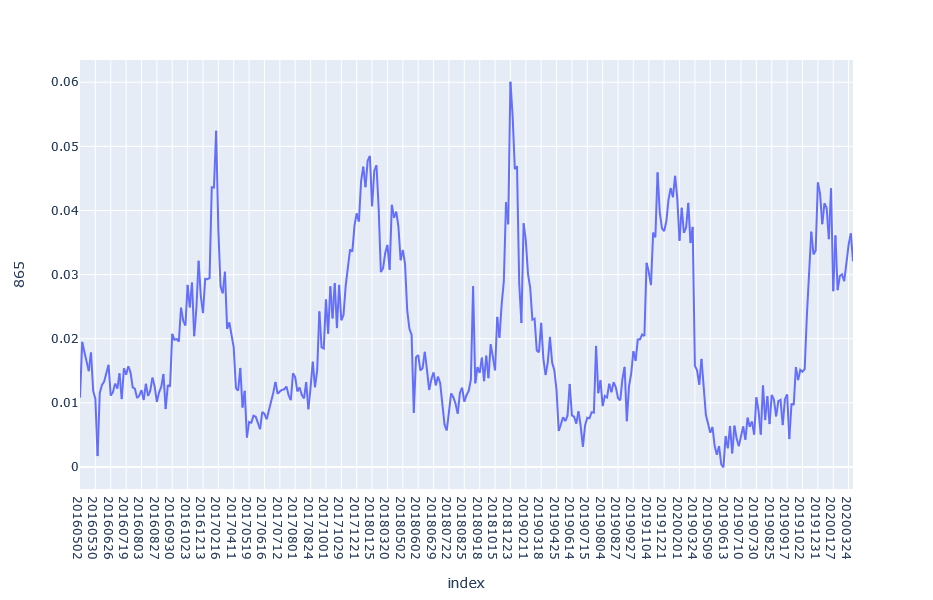

In [249]:
px.line(df, y=865, height=600,)

## Calc mean radiometry (getting 10% of pixels with abs(SWIR) closest to Zero)

In [252]:
df = pd.DataFrame()

for date, radiometry in radiometries.items():
    radiometry = clean_radiometry(radiometry, min_threshold=-0.1, norm_band=None) 
    radiometry['abs_1020'] = radiometry[1020].abs()
    
    
    
    radiometry = radiometry[radiometry['abs_1020']<radiometry['abs_1020'].quantile(q=0.10)]
    
    df = df.append(radiometry.mean().rename(date))

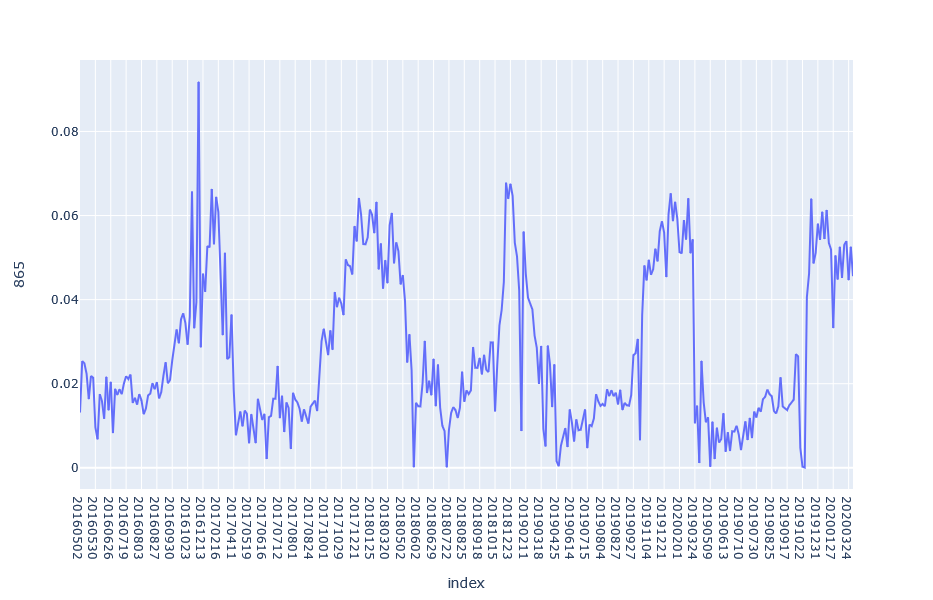

In [253]:
px.line(df, y=865, height=600,)

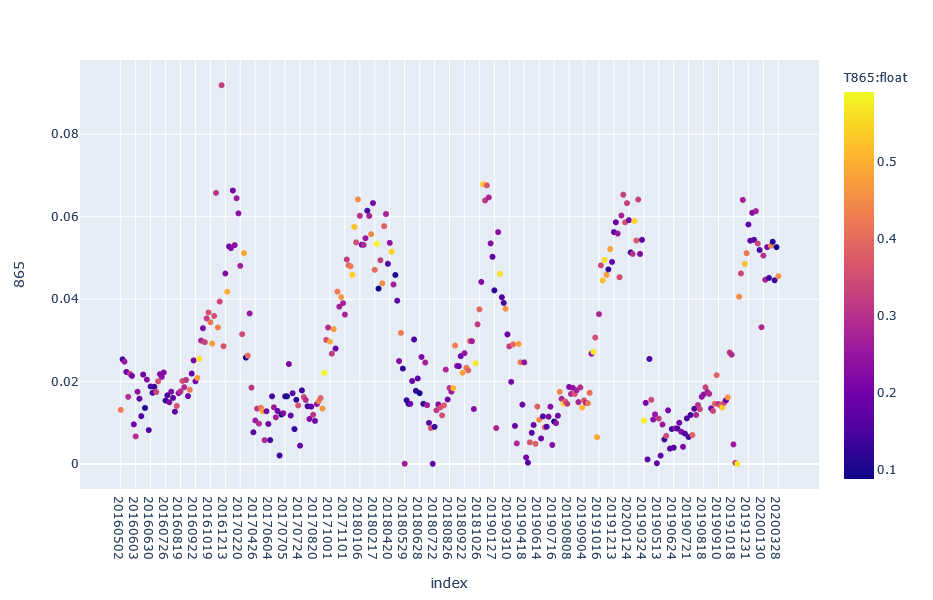

In [255]:
px.scatter(df, y=865, height=600, color='T865:float')